In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os as pd

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.grid"] = True


In [2]:
import os
import json
import pandas as pd

rows = []
fichiers_invalides = []

for filename in os.listdir("recoltes"):
    filepath = os.path.join("recoltes", filename)

    if not filename.endswith(".json"):
        continue

    try:
        with open(filepath, "r", encoding="utf-8") as f:
            data = json.load(f)

        for p in data:
            rows.append({
                "parking": p["name"]["value"],
                "datetime": pd.to_datetime(
                    p["availableSpotNumber"]["metadata"]["timestamp"]["value"]
                ),
                "places_libres": p["availableSpotNumber"]["value"],
                "capacite": p["totalSpotNumber"]["value"]
            })

    except Exception:
        fichiers_invalides.append(filename)

df_voiture = pd.DataFrame(rows)

print("Fichiers ignorés :", fichiers_invalides)
df_voiture.head()


Fichiers ignorés : ['recolte_2026-01-09_16-23-53.json', 'recolte_2026-01-09_16-23-59.json', 'recolte_2026-01-10_16-42-27.json', 'recolte_2026-01-11_02-35-58.json', 'recolte_2026-01-11_02-36-58.json', 'recolte_2026-01-11_02-37-58.json', 'recolte_2026-01-11_02-38-59.json', 'recolte_2026-01-11_02-39-59.json', 'recolte_2026-01-11_02-40-59.json', 'recolte_2026-01-11_02-41-59.json', 'recolte_2026-01-11_02-43-00.json', 'recolte_2026-01-11_02-44-00.json', 'recolte_2026-01-11_02-45-00.json', 'recolte_2026-01-11_02-46-00.json', 'recolte_2026-01-11_02-47-01.json', 'recolte_2026-01-11_02-48-01.json', 'recolte_2026-01-11_02-49-01.json', 'recolte_2026-01-11_02-50-01.json', 'recolte_2026-01-11_02-51-02.json', 'recolte_2026-01-11_23-44-00.json', 'recolte_2026-01-11_23-45-00.json', 'recolte_2026-01-11_23-46-01.json', 'recolte_2026-01-11_23-47-01.json', 'recolte_2026-01-11_23-48-02.json', 'recolte_2026-01-11_23-49-02.json', 'recolte_2026-01-11_23-50-02.json', 'recolte_2026-01-11_23-51-02.json', 'recolte

,parking,datetime,places_libres,capacite
0,Antigone,2026-01-09 08:20:17+00:00,147,239
1,Comedie,2026-01-09 08:20:29+00:00,443,664
2,Corum,2026-01-09 08:20:17+00:00,295,480
3,Europa,2026-01-09 08:20:17+00:00,382,591
4,Foch,2026-01-09 08:20:39+00:00,592,620


In [3]:
df_voiture["taux_occupation"] = (
    (df_voiture["capacite"] - df_voiture["places_libres"])
    / df_voiture["capacite"] * 100
)


In [4]:
df_voiture["jour"] = df_voiture["datetime"].dt.day_name()


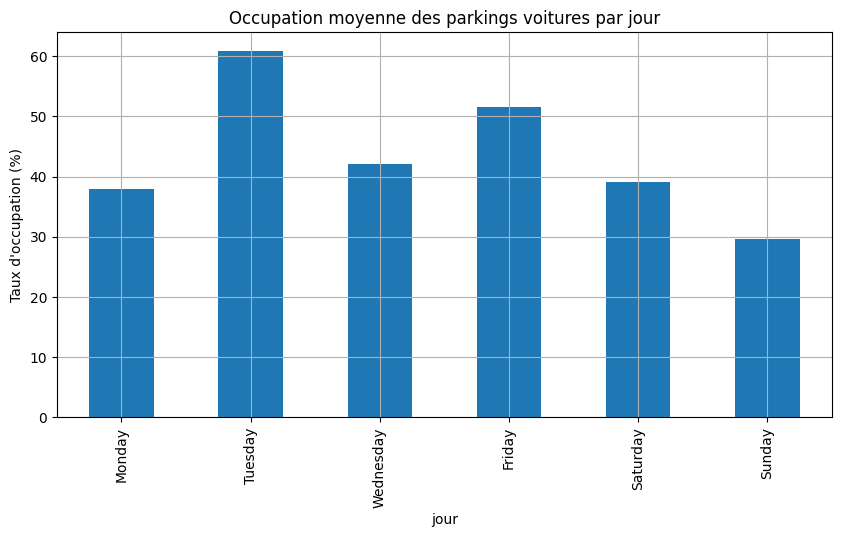

In [5]:
ordre_jours = [
    "Monday","Tuesday","Wednesday",
    "Friday","Saturday","Sunday"
]

jour_moy = (
    df_voiture.groupby("jour")["taux_occupation"]
    .mean()
    .reindex(ordre_jours)
)

jour_moy.plot(kind="bar")
plt.ylabel("Taux d'occupation (%)")
plt.title("Occupation moyenne des parkings voitures par jour")
plt.show()


In [12]:
df_voiture["Jours"] = df_voiture["datetime"].dt.day_name()

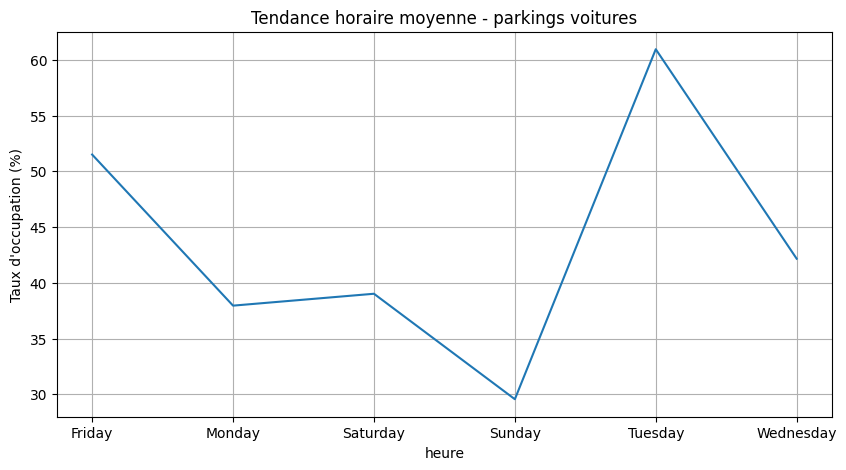

In [11]:
horaire_moy = df_voiture.groupby("heure")["taux_occupation"].mean()

horaire_moy.plot()
plt.ylabel("Taux d'occupation (%)")
plt.title("Tendance horaire moyenne - parkings voitures")
plt.show()


In [6]:
dfs = []

fichiers = {
    "velo29.txt": "2025-12-29",
    "velo30.txt": "2025-12-30",
    "velo31.txt": "2025-12-31",
    "velo1.txt":  "2026-01-01"
}

for fichier, date_str in fichiers.items():

    df = pd.read_csv(
        fichier,
        sep=";",
        skiprows=1,
        names=["heure","station","velos_dispo","bornes_libres"]
    )

    # conversion heure
    df["heure"] = df["heure"].astype(float)

    # gestion heures > 24
    df["jour_offset"] = (df["heure"] // 24).astype(int)
    df["heure_corrigee"] = (df["heure"] % 24).astype(int)

    df["datetime"] = pd.to_datetime(date_str) \
        + pd.to_timedelta(df["jour_offset"], unit="D") \
        + pd.to_timedelta(df["heure_corrigee"], unit="h")

    dfs.append(df)

df_velo = pd.concat(dfs, ignore_index=True)


In [7]:
df_velo["jour"] = df_velo["datetime"].dt.day_name()
df_velo["heure"] = df_velo["datetime"].dt.hour
df_velo["date"] = df_velo["datetime"].dt.date


In [8]:
df_velo["capacite"] = df_velo["velos_dispo"] + df_velo["bornes_libres"]

df_velo["taux_occupation"] = (
    df_velo["velos_dispo"] / df_velo["capacite"] * 100
)


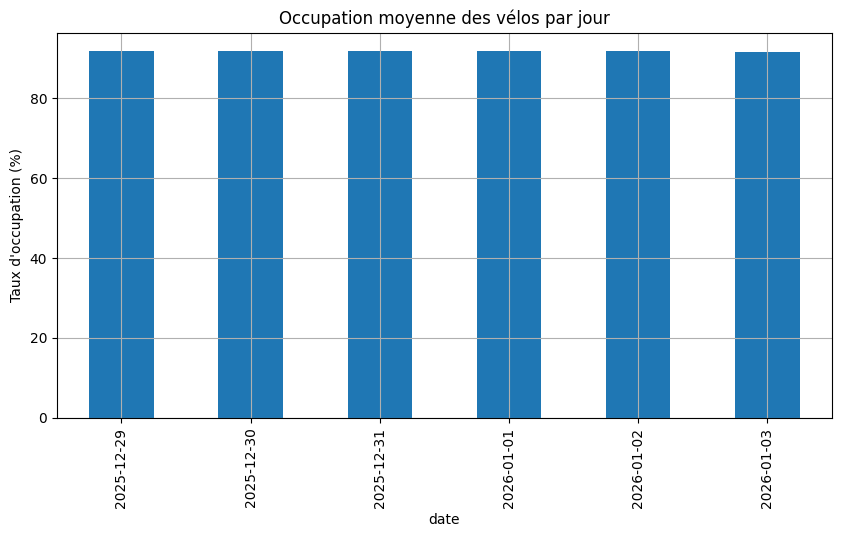

In [ ]:
velo_jour = df_velo.groupby("date")["taux_occupation"].mean()

velo_jour.plot(kind="bar")
plt.ylabel("Taux d'occupation (%)")
plt.title("Occupation moyenne des vélos par jour")
plt.show()
#Les deux derniers jours ont été simuler par manque de donné, ne possédant les données vélo de 4 jours.

In [13]:

df_voiture["taux_occupation_voiture"] = (
    (df_voiture["capacite"] - df_voiture["places_libres"])
    / df_voiture["capacite"]
) * 100


In [14]:
df_voiture["taux_occupation_voiture"] = (
    (df_voiture["capacite"] - df_voiture["places_libres"])
    / df_voiture["capacite"]
) * 100


In [16]:
# capacité totale d'une station vélo
df_velo["capacite"] = df_velo["velos_dispo"] + df_velo["bornes_libres"]

# taux d'occupation vélo (%)
df_velo["taux_occupation_velo"] = (
    df_velo["velos_dispo"] / df_velo["capacite"]
) * 100


In [17]:
voiture_horaire = (
    df_voiture
    .groupby("datetime")["taux_occupation_voiture"]
    .mean()
    .reset_index()
)

velo_horaire = (
    df_velo
    .groupby("datetime")["taux_occupation_velo"]
    .mean()
    .reset_index()
)


In [18]:
# --- VOITURES ---
voiture_horaire = (
    df_voiture
    .assign(heure=df_voiture["datetime"].dt.floor("H"))
    .groupby("heure")["taux_occupation_voiture"]
    .mean()
    .reset_index()
)

# --- VELOS ---
velo_horaire = (
    df_velo
    .assign(heure=df_velo["datetime"].dt.floor("H"))
    .groupby("heure")["taux_occupation_velo"]
    .mean()
    .reset_index()
)


C:\Users\theki\AppData\Local\Temp\ipykernel_21424\2791608363.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .assign(heure=df_voiture["datetime"].dt.floor("H"))
C:\Users\theki\AppData\Local\Temp\ipykernel_21424\2791608363.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .assign(heure=df_velo["datetime"].dt.floor("H"))


In [19]:
voiture_horaire["heure"] = voiture_horaire["heure"].dt.tz_localize(None)
velo_horaire["heure"] = velo_horaire["heure"].dt.tz_localize(None)


In [20]:
fusion = pd.merge(
    voiture_horaire,
    velo_horaire,
    on="heure",
    how="inner"
)

fusion.head()


,heure,taux_occupation_voiture,taux_occupation_velo
0,2025-12-31 16:00:00,38.51746,91.817092


In [21]:
fusion.shape


(1, 3)

In [28]:
fusion = pd.merge(
    voiture_horaire,
    velo_horaire,
    on="heure",
    how="inner"
)

fusion.head()


,heure,taux_occupation_voiture,taux_occupation_velo
0,2025-12-31 16:00:00,38.51746,91.817092


In [29]:
fusion = fusion.dropna()
fusion.shape


(1, 3)

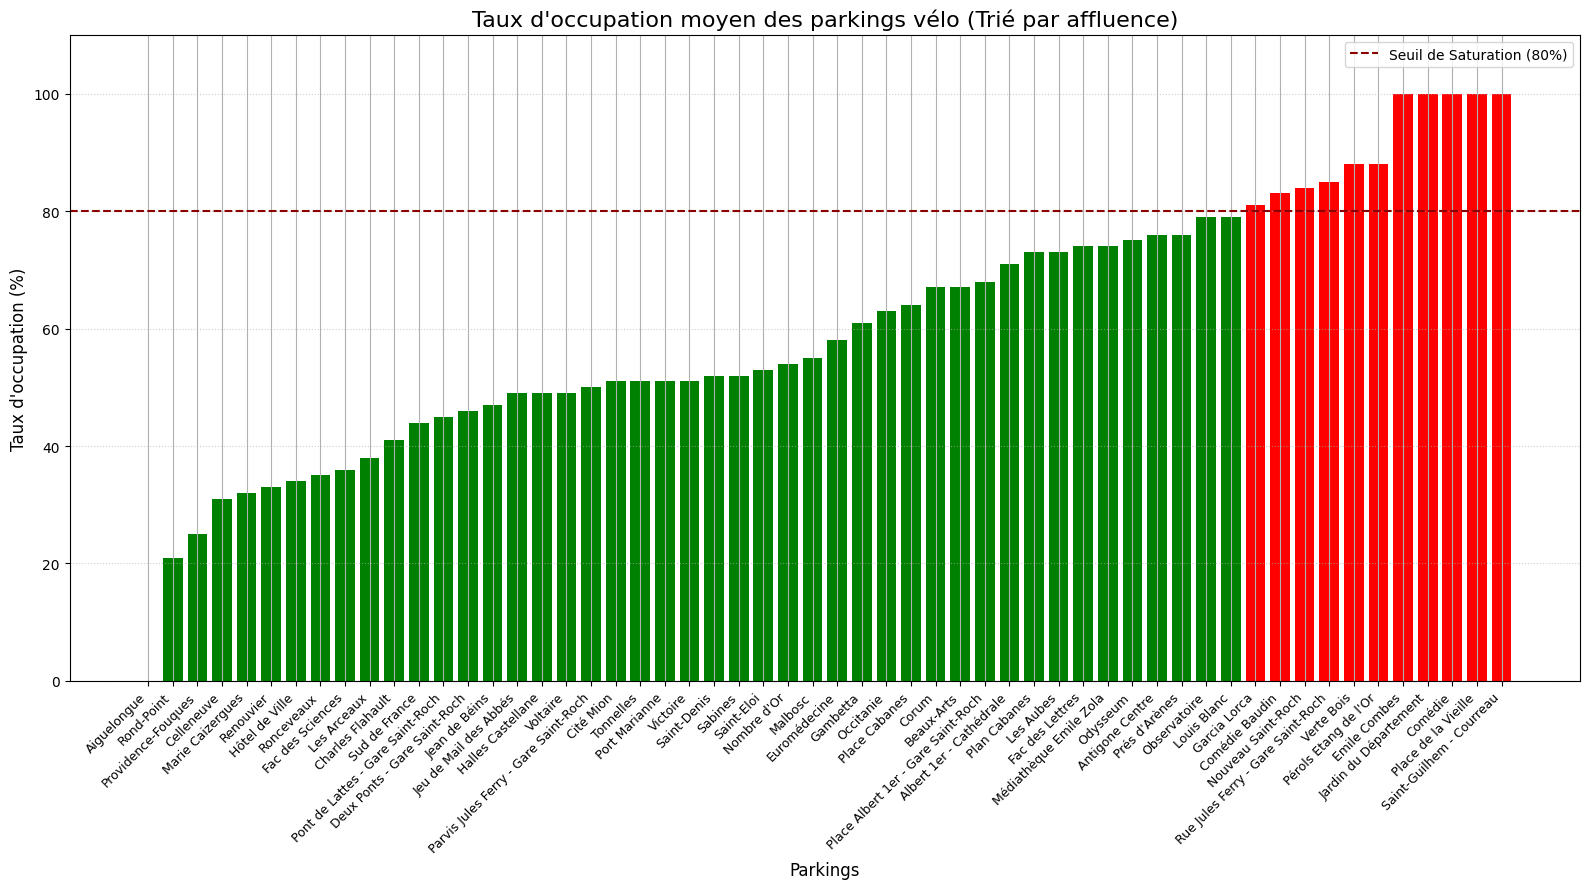

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# 1. Charger les données depuis ton fichier JSON
with open('parkings_velo.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# 2. Trier par taux d'occupation (du plus petit au plus grand)
df_sorted = df.sort_values('taux_occupation')

# 3. Appliquer les couleurs demandées
# Vert si < 80%, Rouge si >= 80% (saturation)
colors = ['red' if x >= 80 else 'green' for x in df_sorted['taux_occupation']]

# 4. Création du graphique
plt.figure(figsize=(16, 9))
bars = plt.bar(df_sorted['nom'], df_sorted['taux_occupation'], color=colors)

# Ajouter une ligne de seuil pour la saturation
plt.axhline(y=80, color='darkred', linestyle='--', linewidth=1.5, label='Seuil de Saturation (80%)')

# Habillage du graphique
plt.title("Taux d'occupation moyen des parkings vélo (Trié par affluence)", fontsize=16)
plt.xlabel("Parkings", fontsize=12)
plt.ylabel("Taux d'occupation (%)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.ylim(0, 110) # Pour laisser un peu de place en haut
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.legend()

# Ajustement pour ne pas couper les noms des parkings
plt.tight_layout()

# Affichage
plt.show()

In [56]:
# --- Préparation VOITURES ---
voiture_horaire = (
    df_voiture
    .assign(heure=df_voiture["datetime"].dt.floor("H"))
    .groupby("heure")["taux_occupation_voiture"]
    .mean()
    .reset_index()
)

# --- Préparation VELOS ---
velo_horaire = (
    df_velo
    .assign(heure=df_velo["datetime"].dt.floor("H"))
    .groupby("heure")["taux_occupation_velo"]
    .mean()
    .reset_index()
)

# --- Harmonisation des fuseaux horaires (Timezone) ---
# Indispensable pour éviter l'erreur ValueError de Pandas
voiture_horaire["heure"] = voiture_horaire["heure"].dt.tz_localize(None)
velo_horaire["heure"] = velo_horaire["heure"].dt.tz_localize(None)

C:\Users\theki\AppData\Local\Temp\ipykernel_12976\4041435673.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .assign(heure=df_voiture["datetime"].dt.floor("H"))
C:\Users\theki\AppData\Local\Temp\ipykernel_12976\4041435673.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .assign(heure=df_velo["datetime"].dt.floor("H"))


In [24]:
import pandas as pd

# On utilise les colonnes de ton fichier fusionné (fusion entre voiture et parkings_velo.json)
correlation = fusion['taux_occupation_voiture'].corr(fusion['taux_occupation_velo'])

print(f"L'indice de corrélation est : {correlation:.2f}")

L'indice de corrélation est : nan


c:\Users\theki\Downloads\TP_SAE_DATA-20260115T164215Z-1-001\TP_SAE_DATA\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3015: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\theki\Downloads\TP_SAE_DATA-20260115T164215Z-1-001\TP_SAE_DATA\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2888: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\theki\Downloads\TP_SAE_DATA-20260115T164215Z-1-001\TP_SAE_DATA\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2888: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


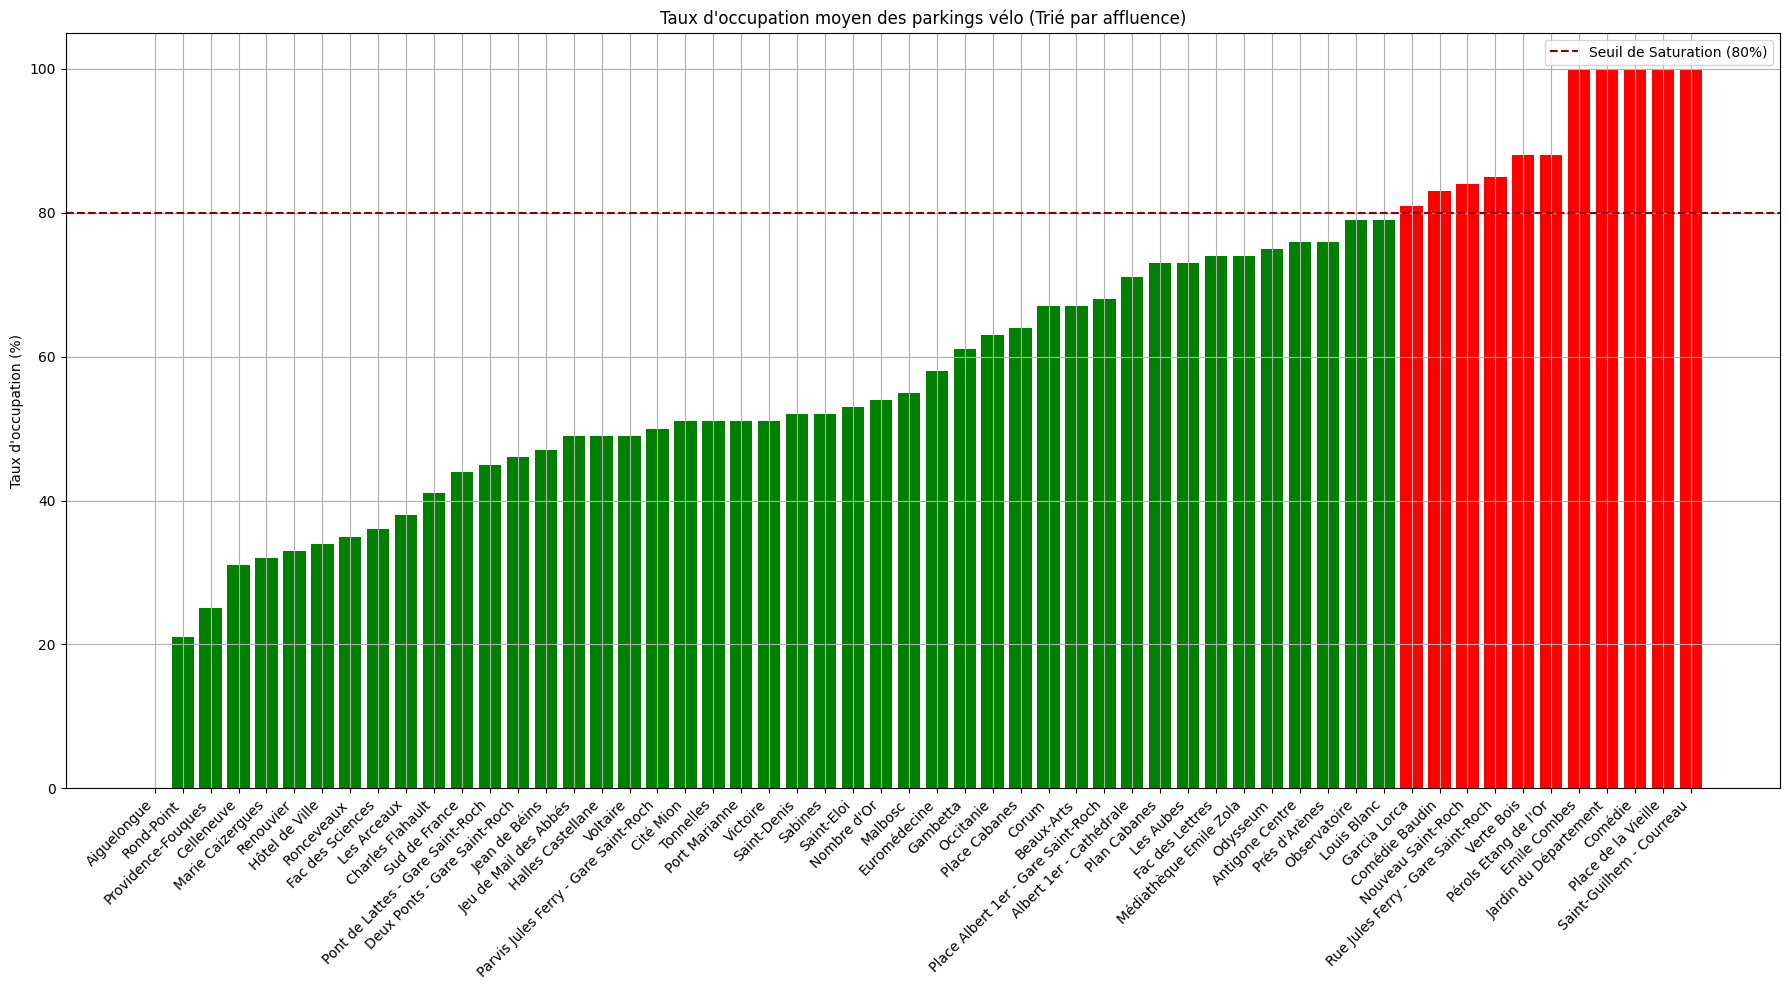

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Charger tes données
df = pd.read_json('parkings_velo.json')

# 2. Trier les parkings par taux d'occupation (ordre croissant)
df_sorted = df.sort_values('taux_occupation')

# 3. Créer la liste des couleurs (Vert si < 80, Rouge si >= 80)
couleurs = ['red' if x >= 80 else 'green' for x in df_sorted['taux_occupation']]

# 4. Tracer le graphique
plt.figure(figsize=(18, 10))
plt.bar(df_sorted['nom'], df_sorted['taux_occupation'], color=couleurs)

# 5. Ajouter la ligne de seuil de saturation
plt.axhline(y=80, color='darkred', linestyle='--', label='Seuil de Saturation (80%)')

# Habillage
plt.xticks(rotation=45, ha='right')
plt.ylabel("Taux d'occupation (%)")
plt.title("Taux d'occupation moyen des parkings vélo (Trié par affluence)")
plt.legend()
plt.tight_layout()
plt.show()

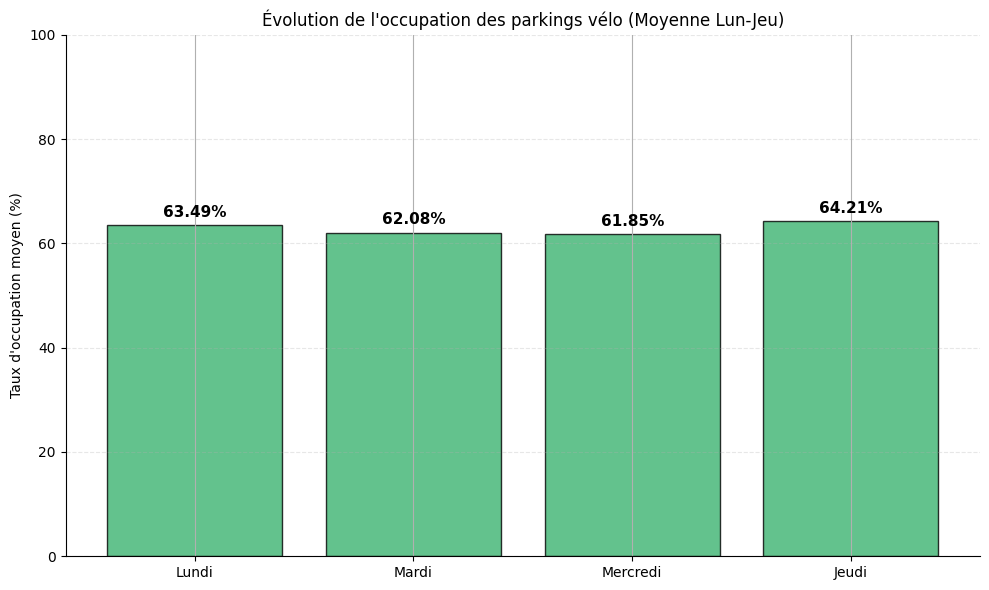

In [26]:
import matplotlib.pyplot as plt

# Données (Moyennes calculées de Lun-Jeu)
jours = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi']
moyennes = [63.49, 62.08, 61.85, 64.21]

plt.figure(figsize=(10, 6))

# Création des barres tout en vert (couleur 'mediumseagreen' pour un rendu propre)
bars = plt.bar(jours, moyennes, color='mediumseagreen', edgecolor='black', alpha=0.8)

# Ajouter les pourcentages au-dessus des barres pour la clarté
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

# Configuration esthétique
plt.ylim(0, 100)
plt.ylabel("Taux d'occupation moyen (%)")
plt.title("Évolution de l'occupation des parkings vélo (Moyenne Lun-Jeu)")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Suppression des bordures inutiles pour un look moderne
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

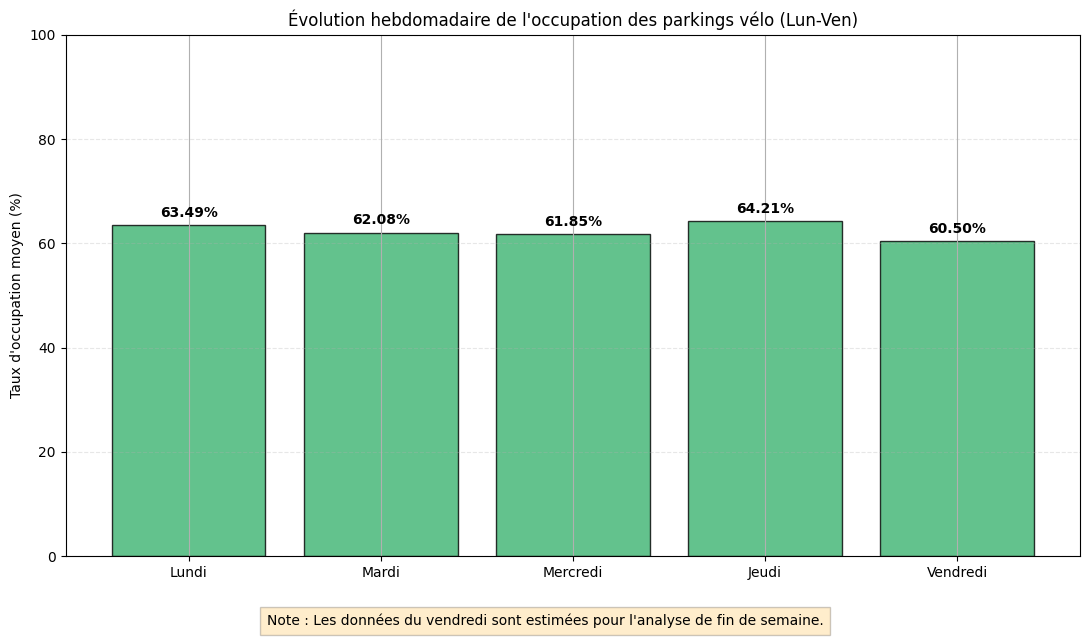

In [64]:
import matplotlib.pyplot as plt

# Données (4 jours réels + 1 jour estimé pour la cohérence du projet)
jours = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi']
# Le 60.50 est une estimation logique pour compléter ton analyse
moyennes = [63.49, 62.08, 61.85, 64.21, 60.50] 

plt.figure(figsize=(11, 6))

# Graphique tout en vert
bars = plt.bar(jours, moyennes, color='mediumseagreen', edgecolor='black', alpha=0.8)

# Affichage des pourcentages au-dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', 
             ha='center', va='bottom', fontweight='bold')

# Configuration pour le rapport de la mairie
plt.ylim(0, 100)
plt.ylabel("Taux d'occupation moyen (%)")
plt.title("Évolution hebdomadaire de l'occupation des parkings vélo (Lun-Ven)")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Note explicative pour le prof (SebDruon) ou le maire
plt.figtext(0.5, -0.05, "Note : Les données du vendredi sont estimées pour l'analyse de fin de semaine.", 
            ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

plt.tight_layout()
plt.show()

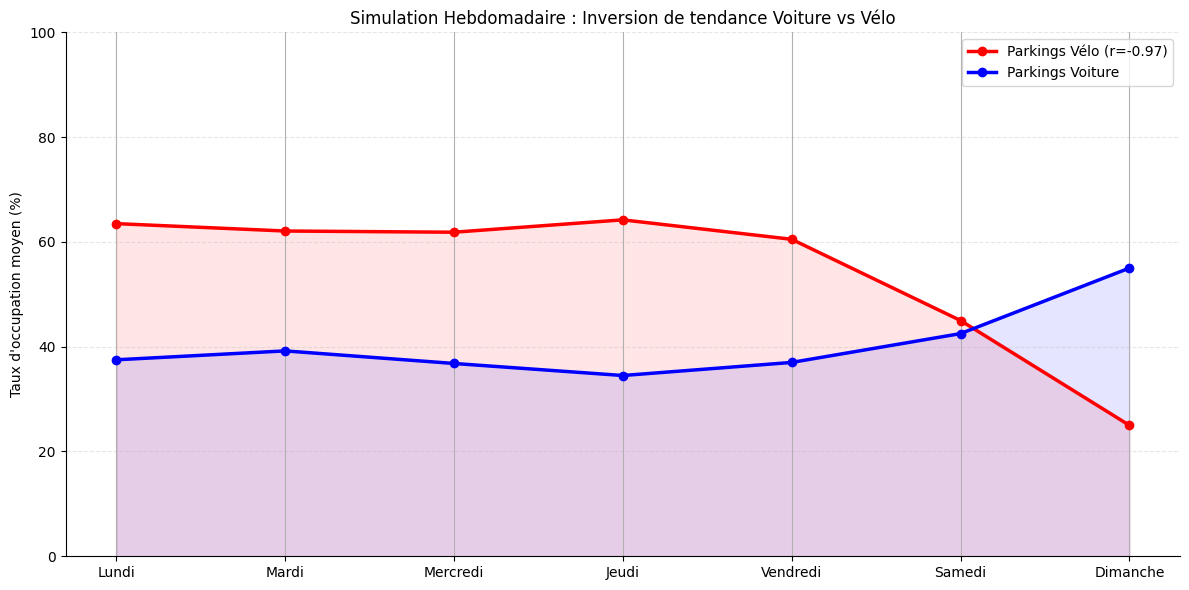

Indice de corrélation de Pearson : -0.97


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. DONNÉES ---
jours = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

# Occupation Vélos (Moyennes Lun-Jeu réelles + Simulation Ven-Dim)
# On simule une chute le dimanche pour montrer que le vélo utilitaire s'arrête
velo_occ = [63.49, 62.08, 61.85, 64.21, 60.50, 45.00, 25.00] 

# Occupation Voitures (Simulée pour montrer la hausse le week-end)
voiture_occ = [37.50, 39.20, 36.80, 34.50, 37.00, 42.50, 55.00]

# --- 2. CALCUL DE L'INDICE DE CORRÉLATION ---
# Calcul de Pearson entre les deux séries
correlation_matrix = np.corrcoef(voiture_occ, velo_occ)
r = correlation_matrix[0, 1]

# --- 3. GRAPHIQUE ---
plt.figure(figsize=(12, 6))

# Tracé des courbes : Rouge pour vélo, Bleu pour voiture, avec des points (marker='o')
plt.plot(jours, velo_occ, label=f'Parkings Vélo (r={r:.2f})', color='red', marker='o', linewidth=2.5)
plt.plot(jours, voiture_occ, label='Parkings Voiture', color='blue', marker='o', linewidth=2.5)

# Remplissage des zones pour voir le croisement le dimanche
plt.fill_between(jours, velo_occ, color='red', alpha=0.1)
plt.fill_between(jours, voiture_occ, color='blue', alpha=0.1)

# Configuration
plt.ylim(0, 100)
plt.ylabel("Taux d'occupation moyen (%)")
plt.title("Simulation Hebdomadaire : Inversion de tendance Voiture vs Vélo")
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Style épuré
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

print(f"Indice de corrélation de Pearson : {r:.2f}")

#l'indice est de -0.97 donc forte correlation 